In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from qutip import *
import scipy.optimize
from matplotlib import pyplot as plt

import cavity_qed_systems
import pulse
import cmps_utils
import tncontract as tn
import parameterized_pulse as ppulse

In [2]:
def optimize_overlap(state, target_mps, pulse):
    """Right now we assume that there is only one pulse."""
    def _obj_fun(x):
        pulse.update(x)
        olap = np.abs(state.get_inner_product(target_mps, [pulse]))**2
        print("Current overlap = ", olap)
        return -olap
    
    def _gradient(x):
        pulse.update(x)
        inner_prod = state.get_inner_product(target_mps, [pulse])
        grad_inner_prod = state.get_inner_prod_gradient(
            target_mps, [pulse])[0]
        grad = -2 * pulse.get_gradient(state.times) @ np.real(
            grad_inner_prod * np.conj(inner_prod))
        #print(np.shape(grad))
        return grad.astype(float)

    print(pulse.bounds())
    print(np.shape(pulse.state()))
    scipy.optimize.minimize(
        _obj_fun, pulse.state(), bounds=pulse.bounds(),jac=_gradient, method="L-BFGS-B") # jac=_gradient,

[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(501,)
Current overlap =  0.0036912536754950495


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.003712804823101932
Current overlap =  0.0037344669559024398
Current overlap =  0.0038216676558570075
Current overlap =  0.004064924888301152
Current overlap =  0.004088266855876908
Current overlap =  0.00410943060530806
Current overlap =  0.0041326174597755855
Current overlap =  0.00415590880757962
Current overlap =  0.004249626090767685
Current overlap =  0.00463313291659713
Current overlap =  0.004648423245701492
Current overlap =  0.004673798807196948
Current overlap =  0.0047758552549751875
Current overlap =  0.004885992919894484
Current overlap =  0.0049123024859361744
Current overlap =  0.004930367025355211
Current overlap =  0.0049563298222206975
Current overlap =  0.005055898290780803
Current overlap =  0.00508224090363005
Current overlap =  0.005108648590826328
Current overlap =  0.005214804826624808
Current overlap =  0.005647605422907113
Current overlap =  0.00749435314698455
Current overlap =  0.008053326477601753
Current overlap =  0.008088928705205245

Current overlap =  0.12131404291239913
Current overlap =  0.12134887598611968
Current overlap =  0.12144916476693875
Current overlap =  0.12148456253832818
Current overlap =  0.12162824299071348
Current overlap =  0.12166914681339336
Current overlap =  0.12170435019779925
Current overlap =  0.12173984481884018
Current overlap =  0.12184023747902142
Current overlap =  0.12187655506131209
Current overlap =  0.12196473966591666
Current overlap =  0.12199660940271094
Current overlap =  0.1219966518900749
Current overlap =  0.12202644574333542
Current overlap =  0.12205496675336784
Current overlap =  0.1220681724555003
Current overlap =  0.12209610750002699
Current overlap =  0.12217428155481634
Current overlap =  0.12220182670726959
Current overlap =  0.12225898042838876
Current overlap =  0.12228397638395104
Current overlap =  0.12230897442442319
Current overlap =  0.12236548032143271
Current overlap =  0.12238846461111866
Current overlap =  0.122479272969451
Current overlap =  0.12249913

Current overlap =  0.12548443382204136
Current overlap =  0.12548445813328116
Current overlap =  0.12548455553413648
Current overlap =  0.12548494763169335
Current overlap =  0.12548655591543662
Current overlap =  0.12549362653127827
Current overlap =  0.12550712467728653
Current overlap =  0.12550714887185566
Current overlap =  0.12550724585117856
Current overlap =  0.12550763698518824
Current overlap =  0.12550925298699067
Current overlap =  0.12551564479667787
Current overlap =  0.12551566067599532
Current overlap =  0.12551572437033595
Current overlap =  0.1255159819807536
Current overlap =  0.12551705774464678
Current overlap =  0.12551981991649297
Current overlap =  0.12551983641650588
Current overlap =  0.1255199026063307
Current overlap =  0.1255201704019105
Current overlap =  0.12552129015936608
Current overlap =  0.1255223631130089
Current overlap =  0.12552236591713584
Current overlap =  0.12552237730031182
Current overlap =  0.12552242549967146
Current overlap =  0.12552266

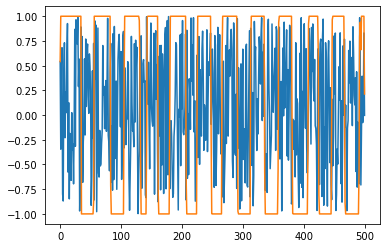

In [3]:
targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], 1, 0.25)
targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [-1,1], 1, 0.25)
delta2 = ppulse.DirectParameterizedPulse(20, 500, [-1, 1])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

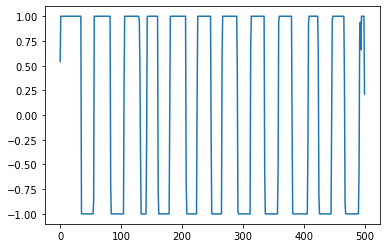

In [4]:
plt.plot(delta2.state())

In [6]:
targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.001, 20000, [0,0], 1, 0.25)
targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
state2 = cavity_qed_systems.ModulatedTavisCumming(0.001, 20000, [-1,1], 1, 0.25)
print(np.abs(state2.get_inner_product(targetMPS2, [pulse.ConstantPulse(0)]))**2)
print(np.abs(state2.get_inner_product(targetMPS2, [delta2]))**2)
print(np.abs(targetState2.get_inner_product(targetMPS2, [pulse.ConstantPulse(0)]))**2)

0.0004322169516432858
0.0706223593617968
0.6735987322368041


In [18]:
pulseTune = delta2 
#pulseTune = pulse.ConstantPulse(0)

def tuningPulse(t, args):
    return pulseTune(t)

N = 3    #number cavity levels

detuning0 = -1
detuning1 = 1
g = 1
gamma_c = 0.25

sm0 = tensor(destroy(2), qeye(2), qeye(N))     # atomic lowering operator 0
sm1 = tensor(qeye(2), destroy(2), qeye(N))     # atomic lowering operator 1
cavLower = tensor(qeye(2), qeye(2), destroy(N))

H0 = sm0.dag()*sm0*detuning0 + sm1.dag()*sm1*detuning1
H_tc = g * (sm0*cavLower.dag() + sm0.dag()*cavLower + sm1*cavLower.dag() + sm1.dag()*cavLower)

#H_stark = tensor(fock(2,1)*fock(2,1).dag(), fock(2,1)*fock(2,1).dag(), qeye(N))

H_stark = cavLower.dag()*cavLower

H = [H0 + H_tc, [H_stark, tuningPulse]]

# collapse operator that describes dissipation
c_ops = [np.sqrt(gamma_c) * cavLower]  # represents cavity emission

#H_stark = tensor(fock(2,1)*fock(2,1).dag(), fock(2,1)*fock(2,1).dag(), qeye(N))

rho0 = tensor(fock(2,1), fock(2,1), fock(N,0))

zeroState = tensor(fock(2,0), fock(2,0), fock(N,0))

In [19]:
tlist = np.linspace(0,20,500)
taulist = np.linspace(0,20,500)

G2 = correlation_4op_2t(H, rho0, tlist, taulist, c_ops, cavLower.dag(), cavLower.dag(), cavLower, cavLower, solver='me', args={})

In [9]:
def G2_shift(G2):
    #t is first index, tau is second index
    shape = np.shape(G2)
    G2_shifted = np.zeros(shape, dtype = 'complex')
    for t_ind in range(shape[0]):
        G2_shifted[t_ind, t_ind:] = G2[t_ind, 0:(shape[-1]-t_ind)]
    return G2_shifted

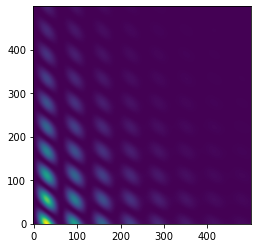

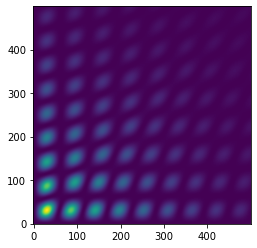

In [10]:
plt.imshow(np.abs(G2.T), origin = 'lower')
plt.show()
G2_shifted = G2_shift(G2) + np.tril(G2_shift(G2).T,-1)
plt.imshow(np.abs(G2_shifted.T), origin = 'lower')
plt.show()

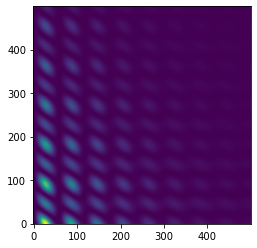

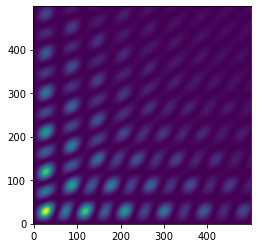

In [15]:
plt.imshow(np.abs(G2.T), origin = 'lower')
plt.show()
G2_shifted = G2_shift(G2) + np.tril(G2_shift(G2).T,-1)
plt.imshow(np.abs(G2_shifted.T), origin = 'lower')
plt.show()

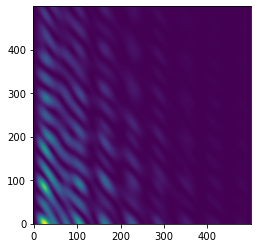

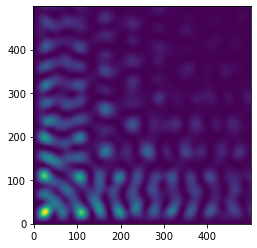

In [20]:
plt.imshow(np.abs(G2.T), origin = 'lower')
plt.show()
G2_shifted = G2_shift(G2) + np.tril(G2_shift(G2).T,-1)
plt.imshow(np.abs(G2_shifted.T), origin = 'lower')
plt.show()

In [21]:
T = 150
tlist = np.linspace(0,20,T)

scattered_state = temporal_scattered_state(H, rho0, 2, c_ops, tlist, zeroState)

correlations = np.zeros((T, T), dtype = 'complex')

for i in range(T):
    for j in range(T):
        # temporal_scattered_state() computes only using ordered emission times, so to  
        # get the full set of correlations, we need to use ordered temporal basis vector
        [a,b] = sorted([i,j])
        basis_vec = temporal_basis_vector([[a,b]], T)
        correlations[i,j] = ((basis_vec.dag() * scattered_state).full().item())

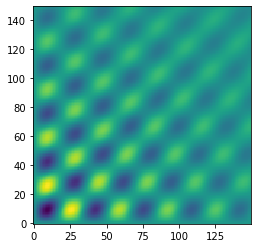

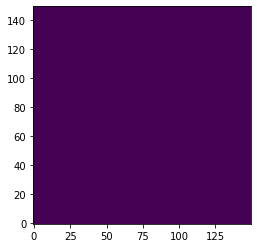

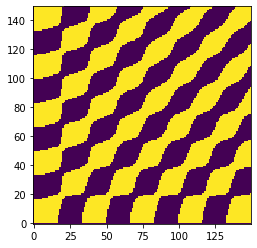

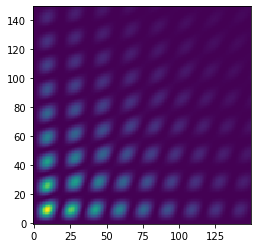

In [12]:
plt.imshow(np.real(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.imag(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.angle(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.abs(correlations)**2, interpolation='nearest', origin='lower')
plt.show()

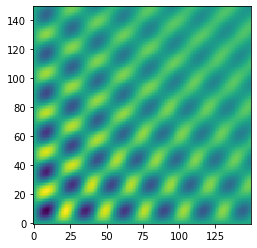

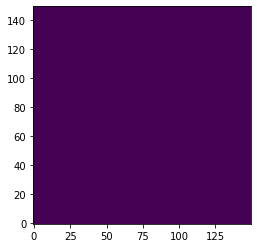

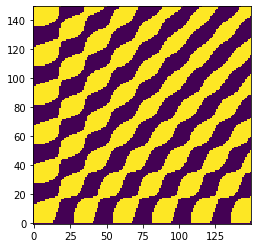

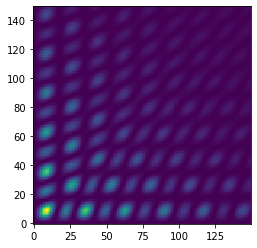

In [17]:
plt.imshow(np.real(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.imag(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.angle(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.abs(correlations)**2, interpolation='nearest', origin='lower')
plt.show()

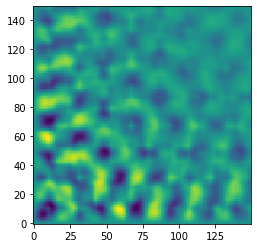

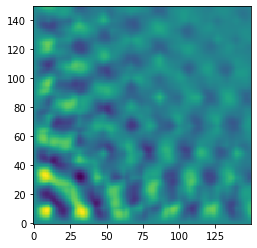

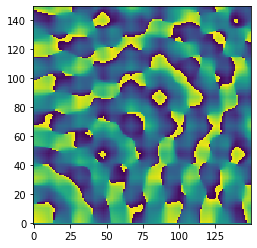

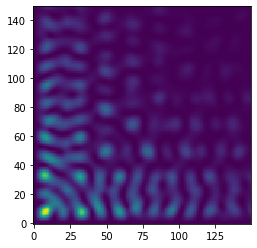

In [22]:
plt.imshow(np.real(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.imag(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.angle(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.abs(correlations)**2, interpolation='nearest', origin='lower')
plt.show()